In [2]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
plt.rcParams.update(
    {
        "lines.linewidth": 0.8,
        "figure.figsize": [8,15],
        "figure.dpi": 200,
        "hatch.color": "grey",
        "font.size": 6
    }
)

In [3]:
import os
project_root = os.path.dirname(os.getcwd())
output_path = os.path.join(project_root, 'outputs')
input_path = os.path.join(project_root, 'data')

In [4]:
from psy_simple.plotters import CMap, Bounds
from psy_maps.plotters import Transform, MapPlot2D, LonLatBox, MapPlotter
from psyplot.plotter import Plotter
import cartopy.crs as ccrs
import psyplot.project as psy
import xarray as xr
import numpy as np
import cfgrib
import zarr
import glob
from PIL import Image

In [5]:
ds_final = xr.open_zarr("/scratch/sadamov/aldernet/data2020")
data_reduced = ds_final.isel(y=slice(450, 514), x=slice(500, 628))
# data_reduced = ds_final

In [6]:
data_reduced

<xarray.Dataset>
Dimensions:               (valid_time: 2184, y: 64, x: 128)
Coordinates: (12/20)
    atmML                 float64 ...
    atmMU                 float64 ...
    entireAtmosphere      float64 ...
    entireLake            float64 ...
    generalVertical       float64 ...
    generalVerticalLayer  float64 ...
    ...                    ...
    nominalTop            float64 ...
    step                  timedelta64[ns] ...
    surface               float64 ...
    thermocline           float64 ...
    time                  datetime64[ns] ...
  * valid_time            (valid_time) datetime64[ns] 2020-01-01 ... 2020-03-...
Dimensions without coordinates: y, x
Data variables: (12/53)
    ALB_DIF               (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    ALB_RAD               (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    ALNU                  (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    ALNUfr                (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    CLC                   (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    CLCT                  (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    ...                    ...
    TQC                   (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    TQV                   (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    TWATER                (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    T_G                   (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    U                     (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
    V                     (valid_time, y, x) float32 dask.array<chunksize=(1, 64, 85), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_edition:            2
    GRIB_subCentre:          255
    history:                 2022-08-31T21:36 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             Zurich

In [7]:
# data_reduced.CORY.data = np.log10(data_reduced.CORY.data + 1)

hihihihi

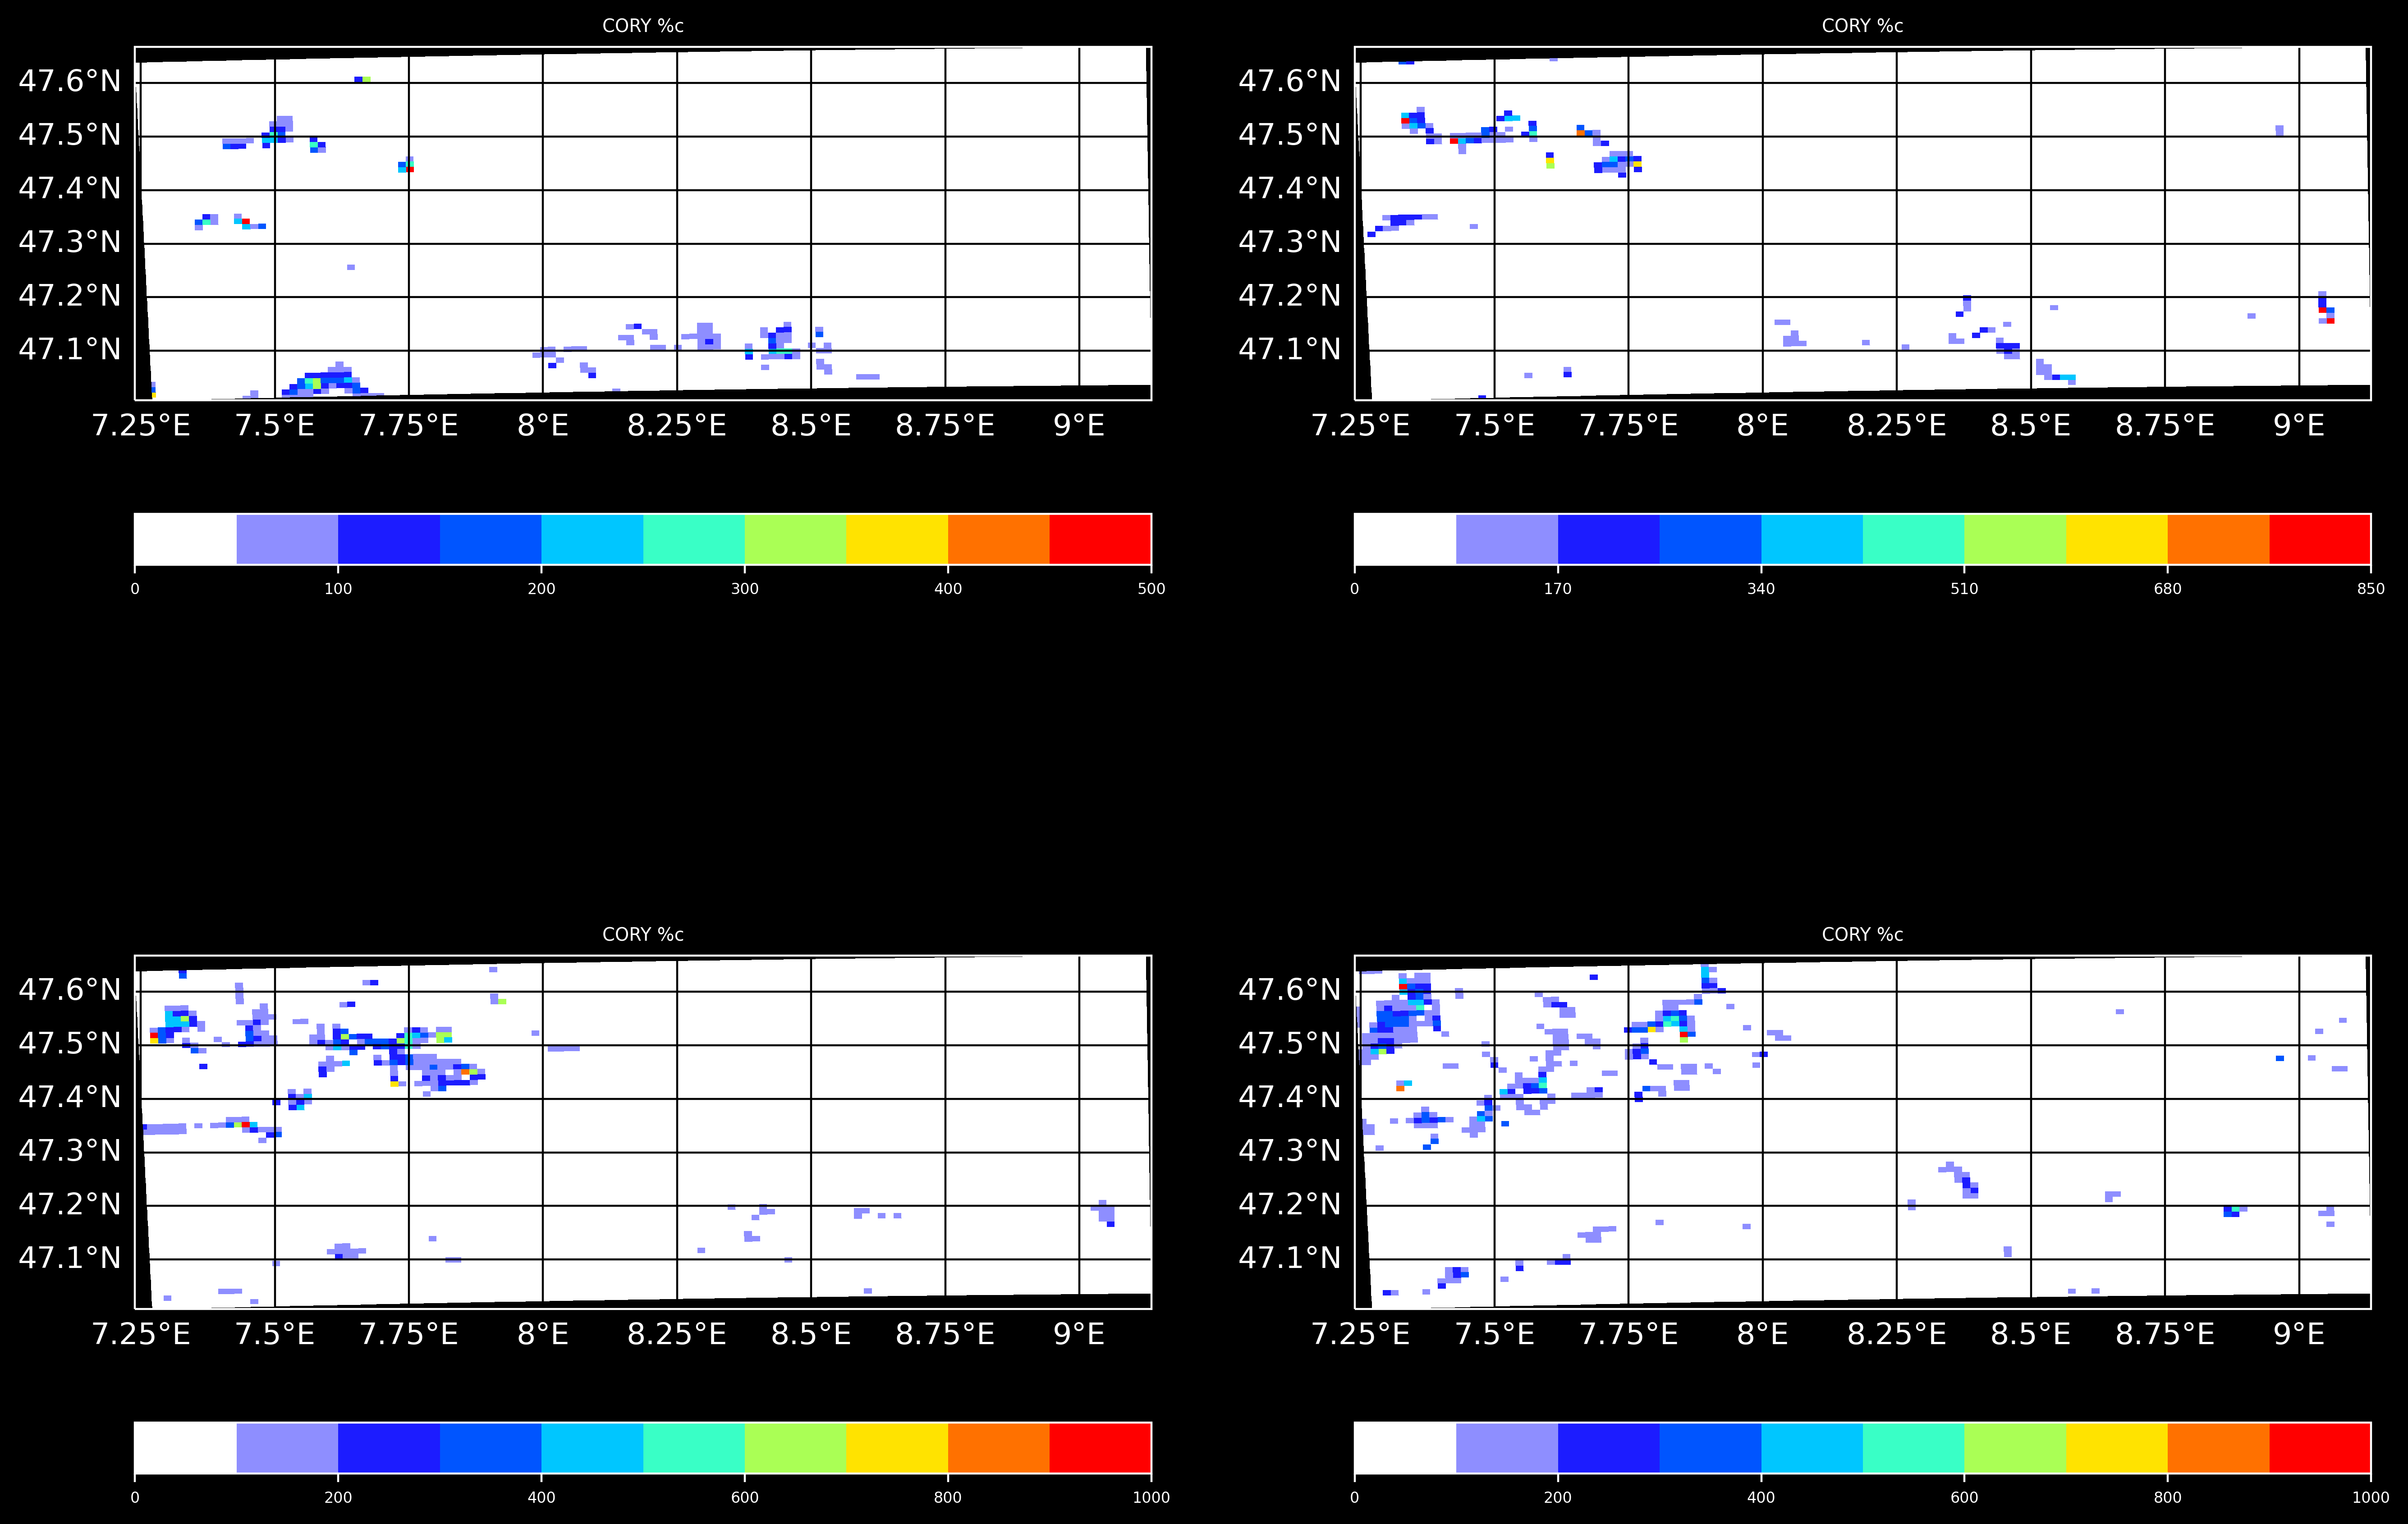

In [8]:
plot1 = data_reduced.psy.plot.mapplot(
    name="CORY",
    valid_time=[700, 701, 702, 703],
    sort=["valid_time"],
    ax=(2, 2),
    title="CORY %c")

# colorbar=[x / 10.0 for x in range(0, 41, 5)]
# plot1.update(bounds = colorbar, 
#              cticks = colorbar)

# plot1.keys('colors')
# plot1.docs("cticks")

# plot1.docs("bounds")

# h = plot1.plotters[0].ax.imshow(data_reduced.CORY.data[0, : ,:], vmin = 0, vmax = 4)
# plot1.plotters[0].ax.figure.colorbar(h)

# arr = plot1[-1]
# plot1[:-1].share(arr, keys='colors')

# arr.psy.update()
# plot1.show()

# plot1.share(keys='colors')
# plot1.show()

# plot1.update(
#     enable_post=True,
#     post="""
# self.data(0,4)
#     """)
# plot1.show()

# map_extent=[5.5, 11.0, 45.5, 48.0]


In [9]:
# for time in range(1, 25):
#     plot1 = ds_final.psy.plot.mapplot(
#         name="ALNUtune",
#         time=time,
#         sort=["time"],
#         title="ALNUtune %c",
#         map_extent=[5.5, 11.0, 45.5, 48.0])

#     plt.ioff()
#     with plot1 as sp:
#         sp.export(output_path + '/map_' + str(time).zfill(3) + '.png')
#     plt.ion


In [10]:
# frames = [Image.open(image) for image in sorted(glob.glob(f"{output_path}/*.png"))]
# frame_one = frames[0]
# frame_one.save(output_path + "/my_awesome.gif", format="GIF", append_images=frames,
#                save_all=True, duration=200, loop=0)
